In [51]:
### Run this cell before continuing.
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
options(repr.matrix.max.rows = 6)

# Heart Disease and Age
<img align="left" src="https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/article_thumbnails/slideshows/how_heart_disease_affects_your_body_slideshow/650x350_how_heart_disease_affects_your_body_slideshow.jpg" width="500"/>

## Introduction

**Background Information**

Heart disease is a broad range of diseases that affects an individual's heart and blood vessels.

These diseases can be influenced by many factors, including underlying health conditions and lifestyle choices.


**Our Question**

Can the age of an individual with heart disease be predicted by the severity of their symptoms? If so, what are the best predictors? 

**The Dataset** 

We are using the “Heart Disease” dataset. This dataset describes a range of attributes, as well as an indication as to the presence of heart disease within each individual. The specific datasets we will be analyzing contains a subset of 14 main attributes, including information about a patient’s sex, age, symptoms, and diagnosis. The data has been collected in a variety of countries.

https://archive.ics.uci.edu/ml/datasets/Heart+Disease

# Methods

In [52]:
# First we must read in the datasets.
van_data_csv <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data",col_names =
               c("age", "sex", "chest_pain", "trestbps", "chol",
               "fbs",  "restecg", "thalach", "exang", "oldpeak", 
               "slope", "ca", "thal", "num")) %>%
                filter(restecg != "?") %>%
                filter(chol != "?") %>%
                filter(trestbps != "?")

cleveland_data_csv <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names =
               c("age", "sex", "chest_pain", "trestbps", "chol",
               "fbs",  "restecg", "thalach", "exang", "oldpeak", 
               "slope", "ca", "thal", "num")) %>%
                filter(restecg != "?") %>%
                filter(chol != "?") %>%
                filter(trestbps != "?")

hungary_data_csv <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data", col_names =
               c("age", "sex", "chest_pain", "trestbps", "chol",
               "fbs",  "restecg", "thalach", "exang", "oldpeak", 
               "slope", "ca", "thal", "num")) %>%
                filter(restecg != "?") %>%
                filter(chol != "?") %>%
                filter(trestbps != "?")

switzerland_data_csv <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data", col_names =
               c("age", "sex", "chest_pain", "trestbps", "chol",
               "fbs",  "restecg", "thalach", "exang", "oldpeak", 
               "slope", "ca", "thal", "num")) %>%
                filter(restecg != "?") %>%
                filter(chol != "?") %>%
                filter(trestbps != "?")

#Next, we can merge these, as they all have the same predictors. More data can ensure our analysis is more accurate.
heart_disease_data <- rbind(van_data_csv,cleveland_data_csv,hungary_data_csv, switzerland_data_csv) %>%
                select(restecg, chol, age, trestbps)
heart_disease_data

Rows: 200 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, chol, fbs, thalach, exang, oldpeak, slope, ca, thal
dbl (5): age, sex, chest_pain, restecg, num

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, chest_pain, trestbps, chol, fbs, restecg, thalach, exang...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, chol, fbs, restecg, thalach, exang, slope, ca, thal
dbl (5): age, sex, chest_pain, oldpeak, num

ℹ Use 

restecg,chol,age,trestbps
<chr>,<chr>,<dbl>,<chr>
1,260,63,140
1,209,44,130
1,218,60,132
⋮,⋮,⋮,⋮
2,0,72,160
1,0,73,160
1,0,74,145


# Exploratory Data Analysis

In [53]:
#in order to make the analysis reproducible:
set.seed(0915)

#split the data into testing and training set:  
heart_split <- initial_split(heart_disease_data, prop = 0.75, strata = age) 
heart_training <- training(heart_split)  
heart_testing <- testing(heart_split)  

#In our exploratory data analysis, we used only three variables as predictors: age, resting electrocardiographic rate, 
#resting blood pressure, and cholesterol levels.
heart_data_explore <- heart_training %>%
             select(age, restecg, trestbps, chol) %>%
             arrange(desc(chol))


head(heart_data_explore)

age,restecg,trestbps,chol
<dbl>,<chr>,<chr>,<chr>
56,0,120,85
54,0,130,603
32,0,118,529
53,0,145,518
44,0,135,491
53,0,113,468


This table shows that individuals with higher cholesterol levels tend to fall within an older age range (50 +)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



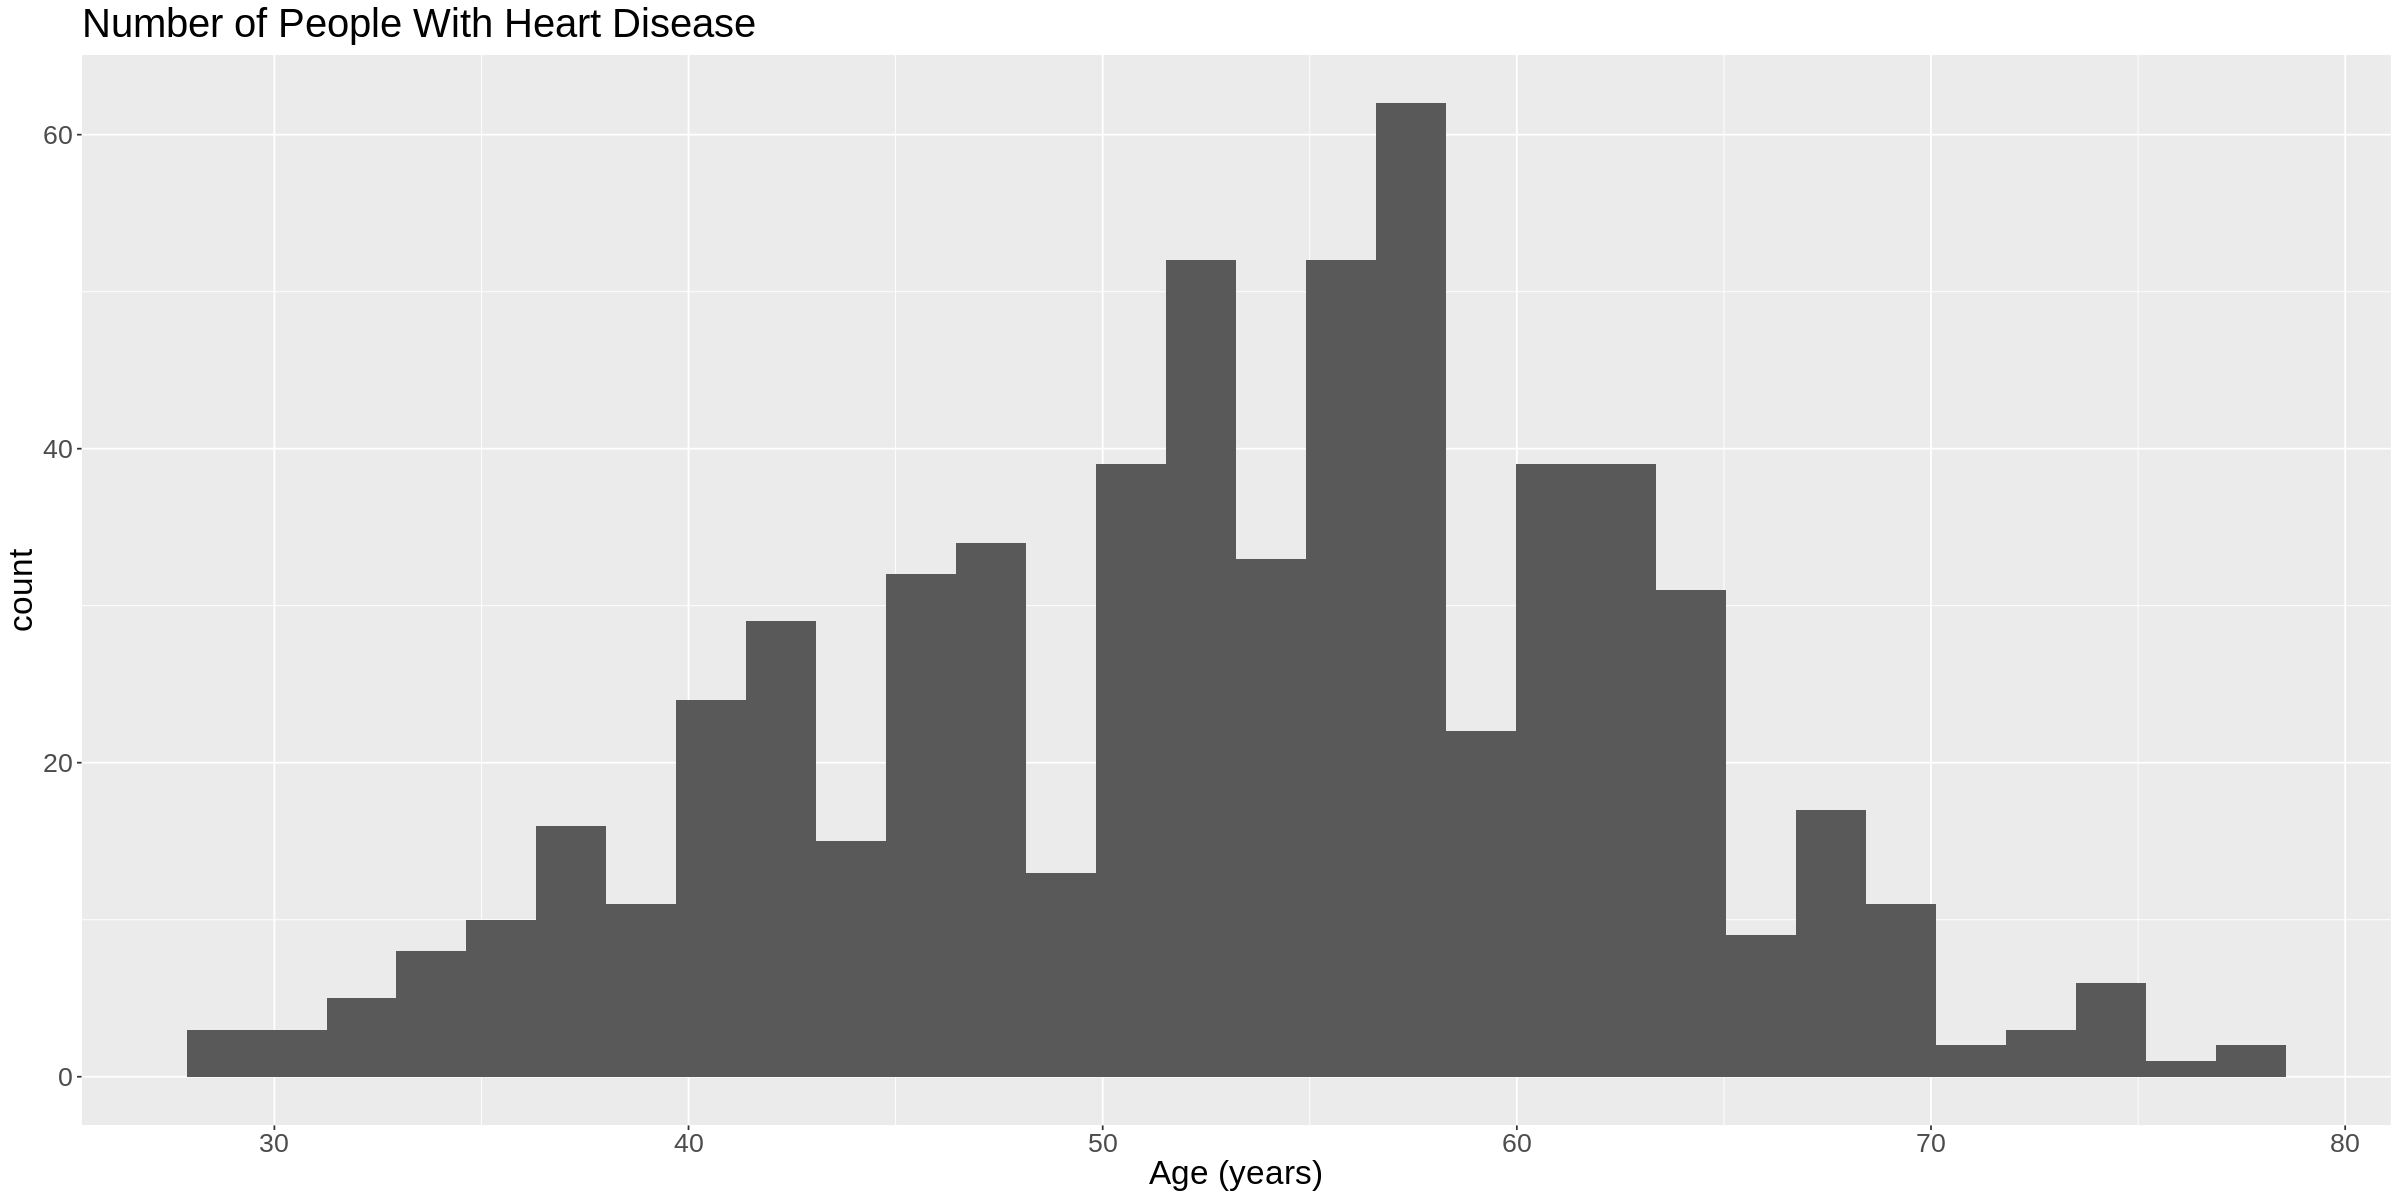

In [54]:
#In order to visualize the age distribution:
heart_plot_hist <- ggplot(heart_training, aes(x = age)) + 
            geom_histogram() + 
            labs(x = "Age (years)", title = "Number of People With Heart Disease") + 
            theme( text = element_text(size = 20)) 
heart_plot_hist

Through this histogram, we can see a correlation between age, and the quantity of people that contract heart disease. The majority of those with heart disease are bewteen the ages of 55 and 65.

# Linear Regression Model

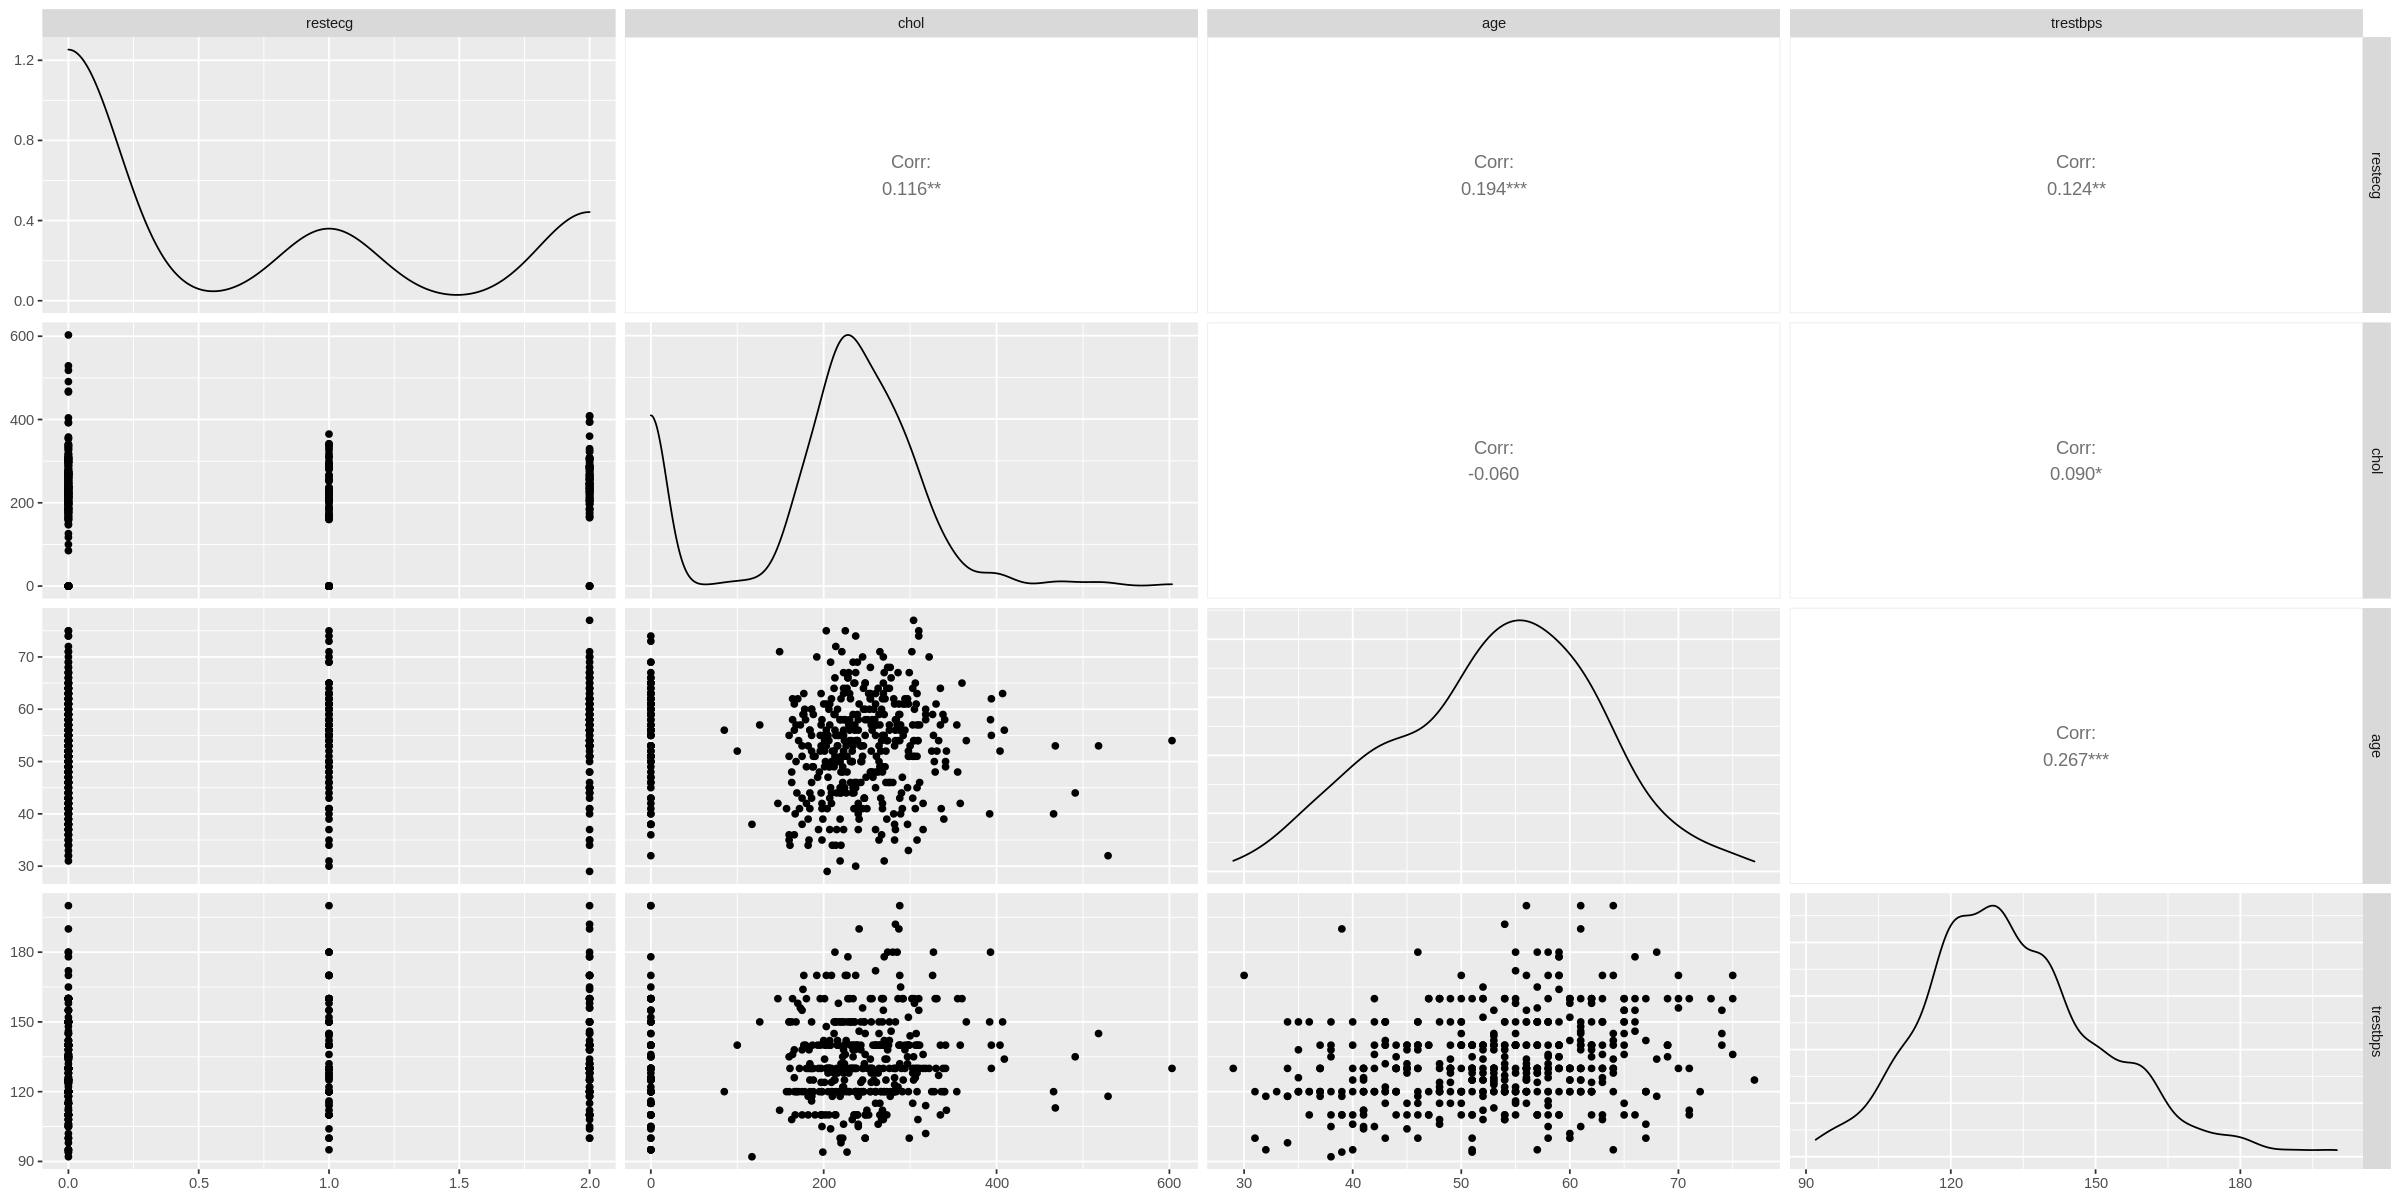

In [56]:
set.seed(2000)

# move to Wrangling 
heart_disease <- heart_disease_data %>%
                 mutate_all(as.numeric)
 
heart_split <- initial_split(heart_disease, prop = 0.60, strata = age)

heart_testing <- testing(heart_split)

heart_training <- training(heart_split)




heart_eda <- heart_training %>%
             ggpairs(columns = 1:4, alpha = 0.05) %>%
             suppressWarnings()

heart_eda

In [75]:
set.seed(2020) #DO NOT REMOVE

lm_spec <- linear_reg() %>%
    set_engine("lm") %>%
    set_mode("regression")

heart_recipe <- recipe(age ~ ., data = heart_training)

print(lm_spec)
print(heart_recipe)

Linear Regression Model Specification (regression)

Computational engine: lm 

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          3


In [76]:
set.seed(2020) # DO NOT REMOVE


heart_fit <- workflow() %>%
    add_recipe(heart_recipe) %>%
    add_model(lm_spec) %>%
    fit(data = heart_training)

heart_fit



══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)      restecg         chol     trestbps  
  37.018975     1.977818    -0.008547     0.125366  


In [77]:
set.seed(2020) # DO NOT REMOVE

lm_rmse <- heart_fit %>%
        predict(heart_training) %>%
        bind_cols(heart_training) %>%
        metrics(truth = age, estimate = .pred) %>%
        filter(.metric == "rmse") %>%
        select(.estimate) %>%
        pull()

lm_rmse



[1] 8.795405

In [78]:
set.seed(2020) # DO NOT REMOVE


lm_rmspe <- heart_fit %>%
        predict(heart_testing) %>%
        bind_cols(heart_testing) %>%
        metrics(truth = age, estimate = .pred) %>%
        filter(.metric == "rmse") %>%
        select(.estimate) %>%
        pull()

lm_rmspe

[1] 8.747361

In [ ]:
set.seed(2000) # DO NOT REMOVE

# Find best K value
heart_spec_2 <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
      set_engine("kknn") %>%
      set_mode("regression") 

heart_recipe_2 <- heart_recipe %>%
      step_scale(all_predictors()) %>%
      step_center(all_predictors())

heart_vfold <- vfold_cv(heart_training, v = 5, strata = age)

heart_workflow_2 <- workflow() %>%
  add_recipe(heart_recipe_2) %>%
  add_model(heart_spec_2)

gridvals <- tibble(neighbors = seq(from = 1, to = 20))

heart_results <- heart_workflow_2 %>%
  tune_grid(resamples = heart_vfold, grid = gridvals) %>%
  collect_metrics() 

k_min <- heart_results %>%
   filter(.metric == "rmse") %>%
   arrange(mean) %>% 
   slice(1) %>%
   select(neighbors) %>%
   pull()

# Find RMSPE using best K value
heart_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) %>%
         set_engine("kknn") %>%
         set_mode("regression")

heart_best_fit <- workflow() %>%
         add_recipe(heart_recipe_2) %>%
         add_model(heart_best_spec) %>%
         fit(data = heart_training)

knn_rmspe <- heart_best_fit %>%
          predict(heart_testing) %>%
          bind_cols(heart_testing) %>%
          metrics(truth = age, estimate = .pred) %>%
          filter(.metric == "rmse") %>%
          select(.estimate) %>%
          pull()


knn_rmspe

[1] 8.763609

# KNN Regression Model

might not use?

*Data Analysis :*

In order to investigate our question we created a K-Nearest Neighbors regression model in order to predict an individual's age, based on their present symptoms.

*1. Model Specification & Recipe*

In [19]:
set.seed(1254) #DO NOT REMOVE

# model specifications 
heart_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
                 set_engine("kknn") %>%
                 set_mode("regression")

# recipe
heart_recipe <- recipe(age ~ ., data = heart_training) %>%
                   step_scale(all_predictors()) %>%
                   step_center(all_predictors())

#heart_spec
#heart_recipe

*2. Cross Validation*

In [22]:
set.seed(1254) #DO NOT REMOVE

heart_vfold <- vfold_cv(heart_training, v = 5, strata = age)

heart_workflow <- workflow() %>%
                     add_recipe(heart_recipe) %>%
                     add_model(heart_spec)
#heart_vfold
#heart_workflow

*3. Use RMSPE to find Best k From Workflow*

a) We are testing out 100 possible k values, then b) determining which k value is associated with the lowest RMSPE value.

In [27]:
# 3. a) 

set.seed(2015) # DO NOT CHANGE

gridvals <- tibble(neighbors = seq(1, 100))

heart_results <- heart_workflow |>
                        tune_grid(resamples = heart_vfold, grid = gridvals) |>
                        collect_metrics()
heart_results

#gridvals
#heart_results


x Fold1: preprocessor 1/1:
  Error in `check_type()`:
  ! All columns selected for the step should be numeric

x Fold2: preprocessor 1/1:
  Error in `check_type()`:
  ! All columns selected for the step should be numeric

x Fold3: preprocessor 1/1:
  Error in `check_type()`:
  ! All columns selected for the step should be numeric

x Fold4: preprocessor 1/1:
  Error in `check_type()`:
  ! All columns selected for the step should be numeric

x Fold5: preprocessor 1/1:
  Error in `check_type()`:
  ! All columns selected for the step should be numeric

Warning message:
“All models failed. Run `show_notes(.Last.tune.result)` for more information.”


ERROR: [1m[33mError[39m in [1m[1m`estimate_tune_results()`:[22m
[33m![39m All of the models failed. See the .notes column.


In [ ]:
# 3. b)
set.seed(2016) # DO NOT REMOVE

heart_min <- heart_results |>
    filter(.metric == "rmse") |>
    arrange(mean)  |> 
    slice(1)

#heart_min

*4. Assessing Model Prediction Accuracy*

 a) We re-trained our k-nn regression model on the entire heart_training set,      using the k value we obtained from the previous step.

 b) We repeated the workflow analysis again, this time using our k_min for a new model specification.
 
 c) Finally, we made predictions on the test data, and determined the regression's quality using the metrics function again.

In [28]:
# 4.

set.seed(1254) #DO NOT REMOVE

# 4. a) 

k_min <- heart_min |>
            pull(neighbors)


# 4. b)

heart_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |>
                            set_engine("kknn") |>
                            set_mode("regression")

heart_best_fit <- workflow() |>
                        add_recipe(heart_recipe) |>
                        add_model(heart_best_spec) |>
                        fit(data = heart_training)


# 4. c)

heart_summary <- heart_best_fit |> 
                       predict(heart_testing) |>
                       bind_cols(heart_testing) |>
                       metrics(truth = age, estimate = .pred) 

#heart_summary


*5. Visualizing Relationship between Age and Predictors Using Best k-value*

In [31]:
# 5.

set.seed(2015) # DO NOT CHANGE

options(repr.plot.width = 7, repr.plot.height = 7)

heart_preds <- heart_best_fit %>%
                predict(heart_training) %>%
                bind_cols(heart_training)

heart_plot <- ggplot(marathon_preds, aes(x = #max#, y = age)) +
            geom_point(alpha = 0.4) +
            xlab(#"Maximum Distance Ran per \n Week During Training (mi)"#) +
            ylab("Age (Years)") + 
            geom_line(data = heart_preds, aes(x = #max#, y = .pred), color = "blue") +
            ggtitle(paste#0#("K = ", k_min)) +
            theme(text = element_text(size = 20))


#heart_plot



ERROR: Error in parse(text = x, srcfile = src): <text>:17:13: unexpected symbol
16:             ggtitle(paste#0#("K = ", k_min)) +
17:             theme
                ^


TO DO: 
- create regression model
- graph prediction accuracy, determine best predictors


# Discussion

TO DO:
- summarize findings. Is there a relationship? What is it? What are the best predictors?
- Were our results expected?
- Impact of our findings?
- Future Questions?